In [2]:
from IPython.display import display, Markdown, Latex

from product import Option
from strategy import *
from euronext import Page
from graph import Graph

g=Graph(4800, 5500, 25)
p = Page(ticker_idx=0, expiry='12-2018')
p.fetch()
options = p.scrap_options()
call = p.call
put = p.put
for k, o in p.call.items():
    o.multiplier=10
for k, o in p.put.items():
    o.multiplier=10


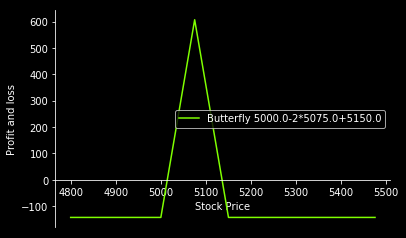

Cost-Butterfly : 143.00€


Category,strike,direction,Quantity,Cost
Call,5000,long,1,674
Call,5075,short,2,-744
Call,5150,long,1,213


In [4]:
butterfly = Butterfly(call[5000], call[5075], call[5150])
g.profit_strategy(butterfly)
print('Cost-Butterfly : {:0.02f}€'.format(butterfly.cost()))
g.display_summary(butterfly)

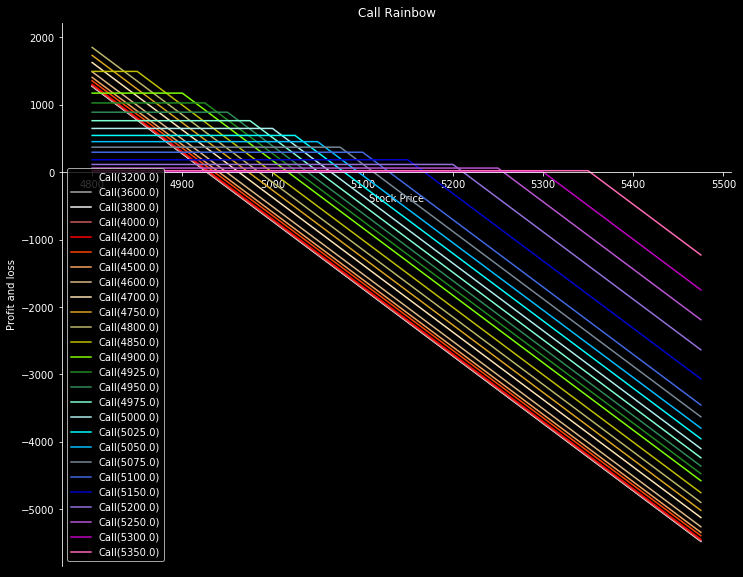

In [5]:
g.profit_rainbow(call.values(), 'short', title='Call Rainbow')

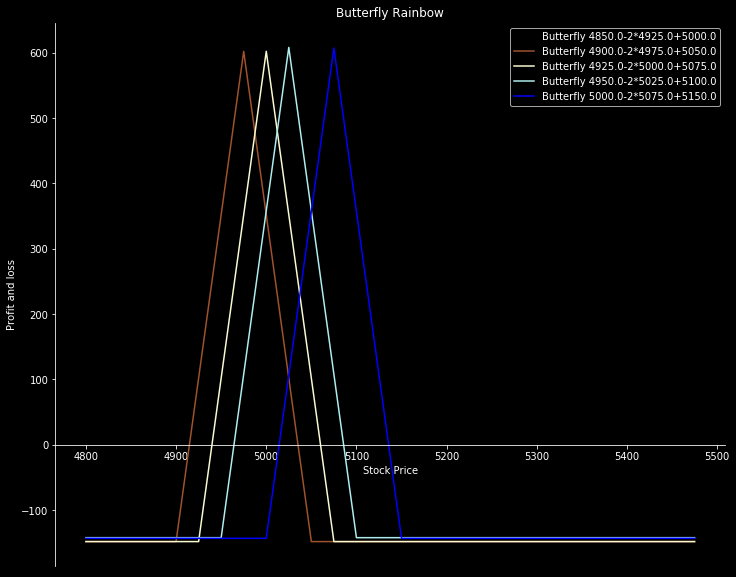

In [6]:
bfs = Butterfly.explorator(call.values(), step=75)
g.profit_rainbow(bfs, 'long', title='Butterfly Rainbow')

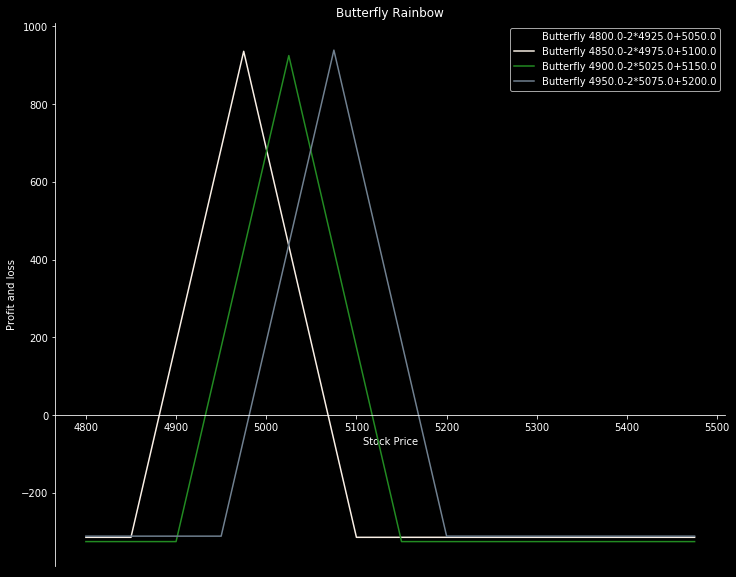

In [7]:
bfs = Butterfly.explorator(call.values(), step=125)
g.profit_rainbow(bfs, 'long', title='Butterfly Rainbow')